

## **Project 1 - Fundamental of AI & ML**

### **Title**: *EDA on Cardio Good Fitness data*

### **Author**: *Pankaj Singh*

<br>

**Domain** : Customer analytics

**Data Description** : The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness.

**Attribute Information** 

- **`Product`** : The model no. of the treadmill <br>
- **`Age`** : Age of the customer in no of years <br>
- **`Gender`** : Gender of the customer <br>
- **`Education`** : Education of the customer in no. of years <br>
- **`Marital Status`** : Marital status of the customer <br>
- **`Usage`** : Avg. # times the customer wants to use the treadmill every week <br>
- **`Fitness`** : Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
- **`Income`** : Income of the customer <br>
- **`Miles`** : Miles that a customer expects to run <br>

**Project Objective**

- Explore the dataset to identify differences between the customers of each product. 
- Explore relationships between the different attributes of the customers. 
- Propose any other line of questioning that could be relevant for the business.

**Project Deliverables**

- Coming up with a customer profile (characteristics of a customer) of the different products
- Perform univariate and multivariate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers.

**Learning Objective**
- Exploratory Data Analysis
- Expand the knowledge of NumPy, Pandas and Seaborn

### **Import Libraries**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
sns.set_style('whitegrid')
sns.set_context('poster')

warnings.filterwarnings('ignore')

### **Load data**

In [2]:
cardio = pd.read_csv('CardioGoodFitness.csv')

### **Data Statistics**


- #### Shape of the data

In [3]:
## Print out the shape of data
cardio.shape

(180, 9)

> The dataset has 180 observations and 9 columns

- #### A peek at the first 5 rows of the dataset

In [4]:
## Print out the first 5 rows of the data
cardio.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


- #### Check the data types in each columns

In [5]:
## Print out the data tyoe of each attribute
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

> - Numeric attributes: `Age`, `Education`, `Usage`, `Fitness`, `Income`, `Miles`
> - Object attributes: `Product`, `Gender`, `MaritalStatus`
>
> NOTE: Even though `Fitness` appears in numerical attributes, but due to its discrete nature in finite range it can be considered categorical

- **Check if there is any null data**

In [6]:
# Checking the presence of missing values
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

> The dataset has no null values.

> The 4 categorical columns (including `Fitness`) have following unique values:
> - `Product` has 3 unique values
> - `Gender` has 2 unique values
> - `MaritalStatus` has 2 unique values
> - `Fitness` has 5 unique vlaues

### **Univariate Analysis**

- **Describe the numerical data**

In [7]:
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- **Visualize the distributions of the numerical columns**

In [8]:
def plot_bar_box_violin(x,color):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    
    seriesname = x.name
    plt.suptitle(f'Histogram, Boxplot and Violinplot for {seriesname}', fontweight='heavy')
    
    sns.histplot(x, ax=ax[0], kde=True, shrink=0.9,color=color)
    ax[0].axvline(x.mean(), color = 'r', linestyle = '--', label = 'Mean')    
    ax[0].axvline(x.median(), color = 'g', linestyle = '-.', label = 'Median')
    ax[0].axvline(x.mode()[0], color = 'b', linestyle = 'dotted', label = 'Mode')
    ax[0].legend(frameon=True)
    
    sns.boxplot(x, ax=ax[1], showmeans=True,color=color,
                meanprops=dict(marker='o',markerfacecolor='white',markeredgecolor='k',markersize=10),
                medianprops=dict(color='lightgray',linestyle='--', linewidth=5))
    
    
    sns.violinplot(x, showmeans=True, ax=ax[2],color=color)
    ax[2].scatter(x.median(), 0,c='k',marker='s')

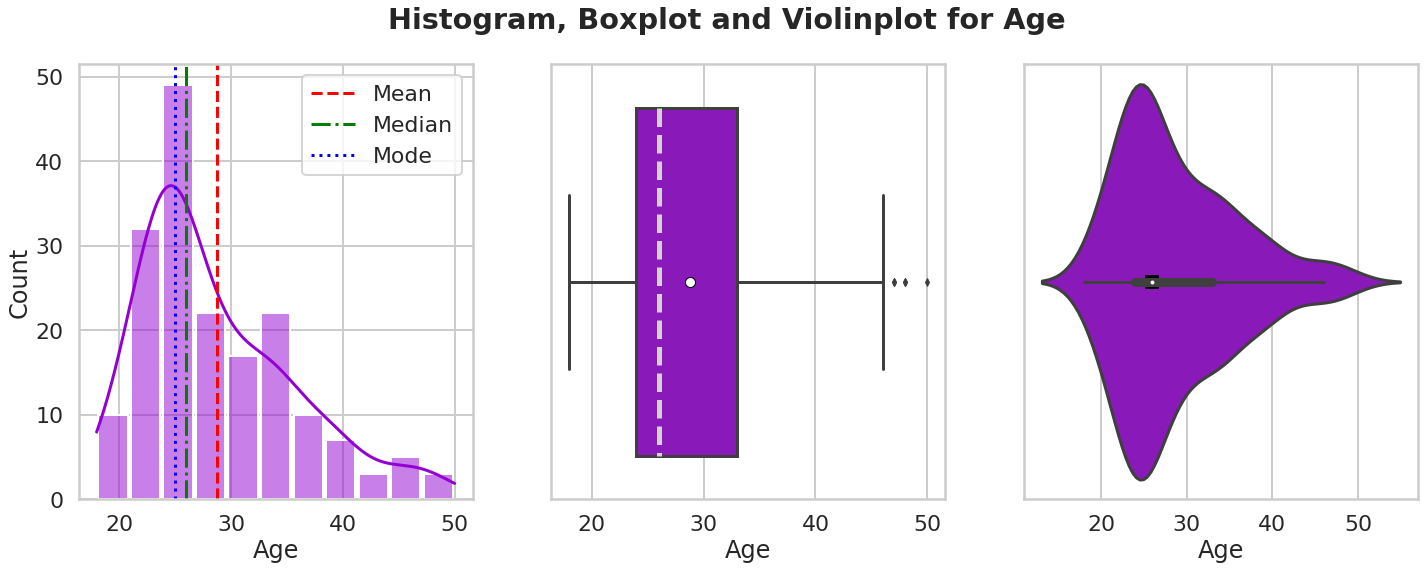

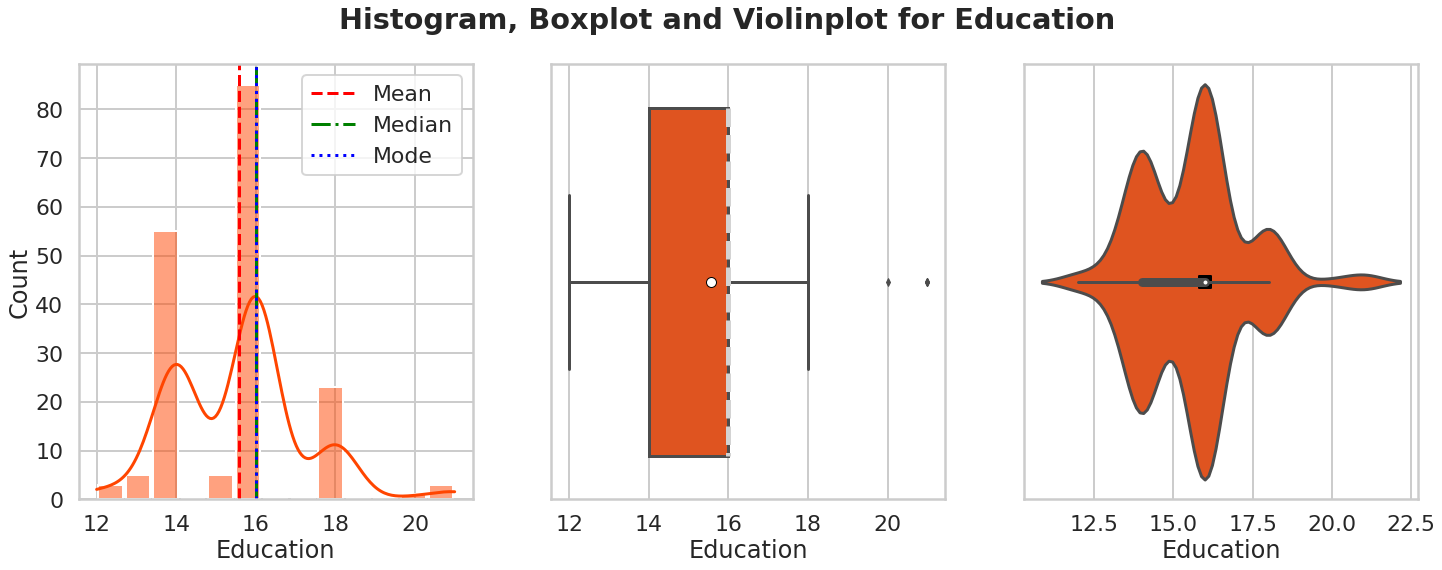

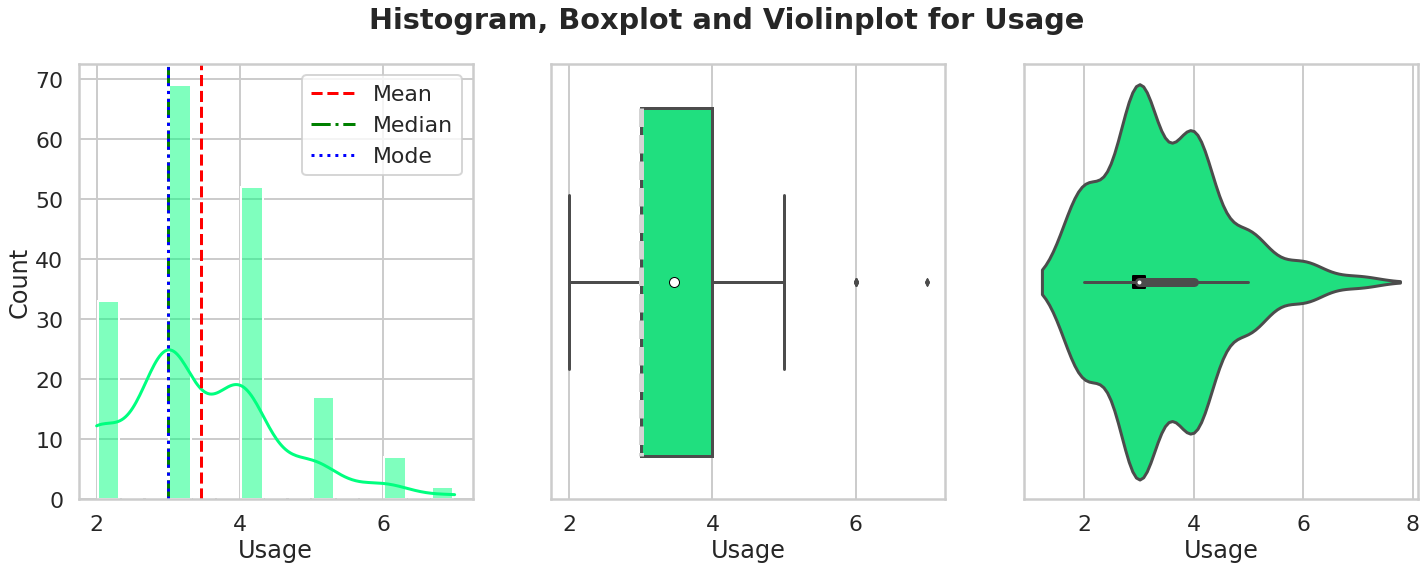

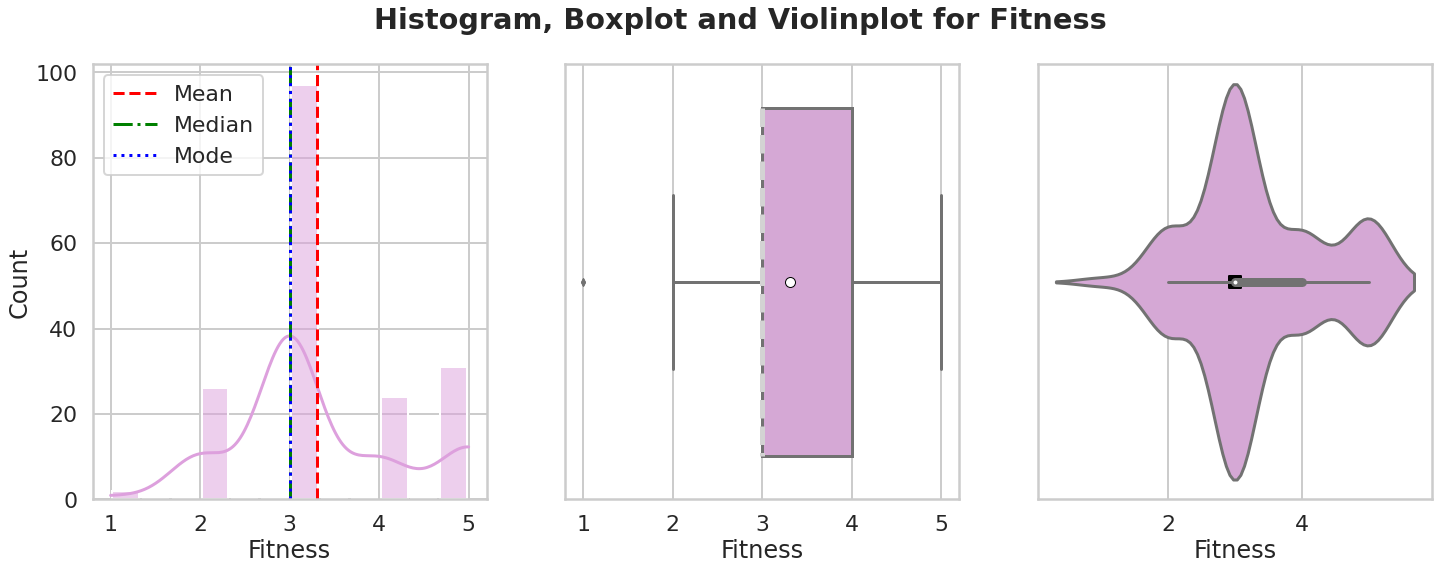

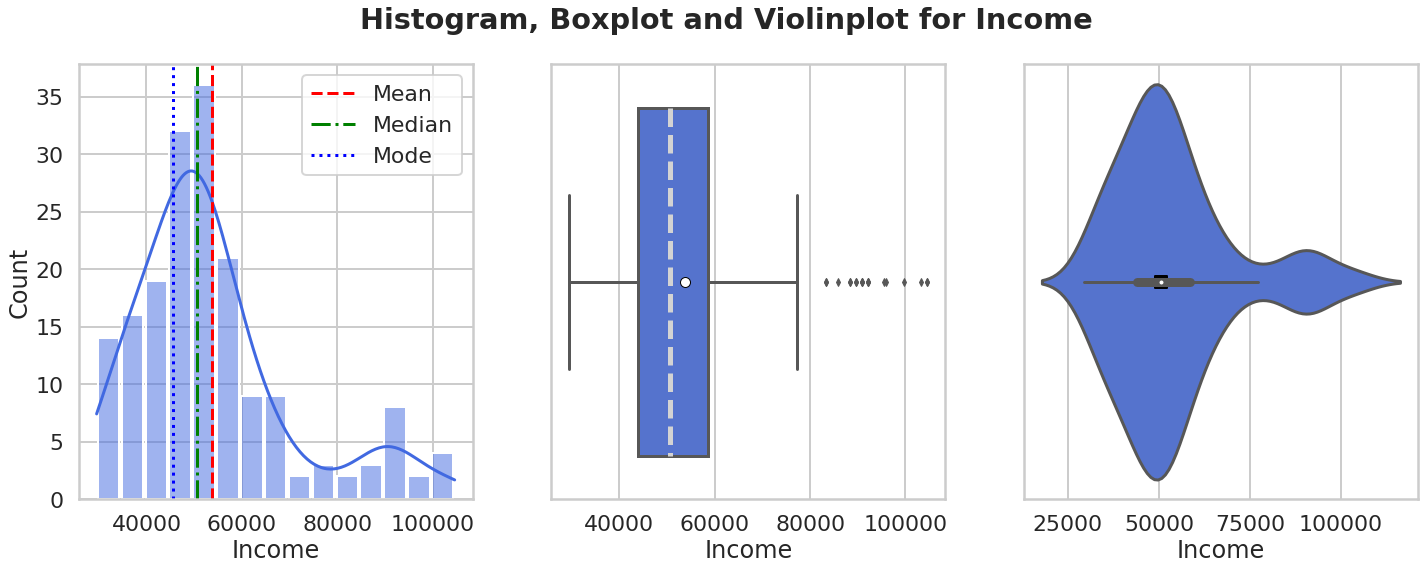

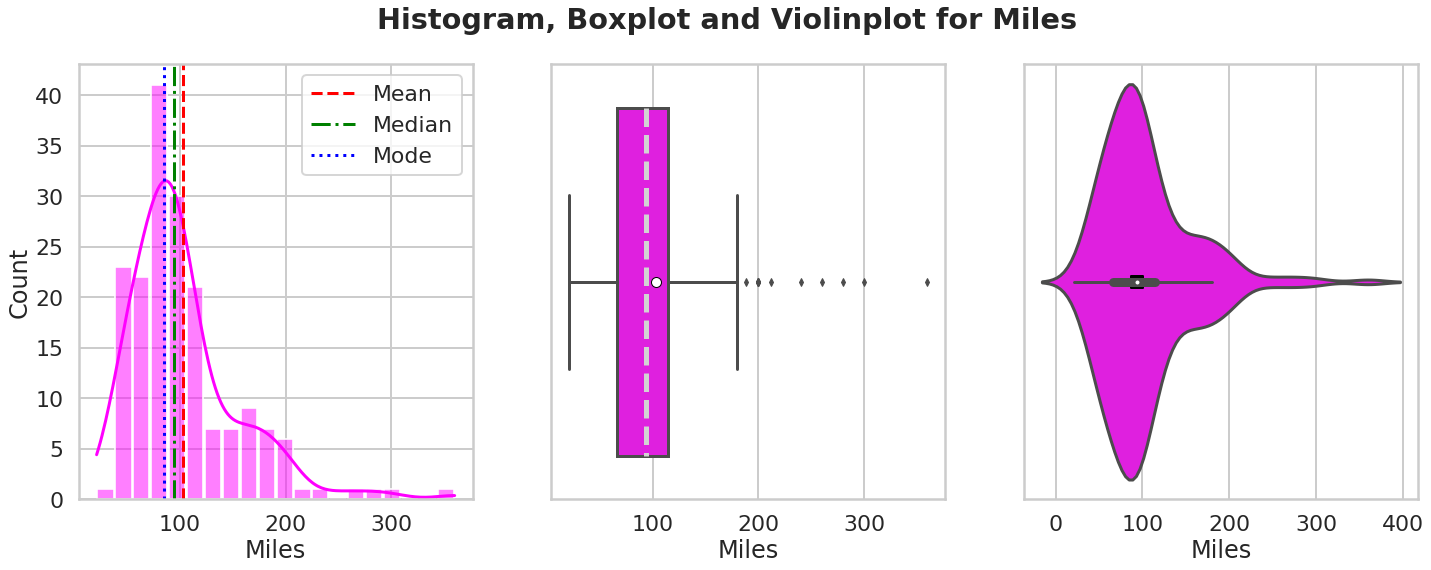

In [9]:
plot_bar_box_violin(cardio['Age'],'darkviolet')
plot_bar_box_violin(cardio['Education'],'orangered')
plot_bar_box_violin(cardio['Usage'],'springgreen')
plot_bar_box_violin(cardio['Fitness'],'plum')
plot_bar_box_violin(cardio['Income'],'royalblue')
plot_bar_box_violin(cardio['Miles'],'fuchsia')

> **Observations**

> - The `Age` of users is between 18 and 50 years
>   - The median user age is \~26 years and is less than the mean age (\~29 years). Hence distribution is right skewed
>   - There are few outliers beyond age 45


> - The user `Education` years is between 12 and 21
>   - The median education years is \~16 years and the mean education years is \~15.5 years
>   - There are few outliers who have more than 18 years of education

> - The weekly treadmill `Usage` is between 2 to 7 times
>   - The median weekly usage is 3 times and is less than the mean weekly usage (\~3.5 times). Hence distribution is right skewed
>   - Majority usage is 3 to 4 times a week, with few outliers who are using it 6-7 times a week

> - The `Fitness` levels of users is between 1 to 5
>   - The median fitness level is 3 and the mean fitness is \~3.3
>   - The average user believes that they are decently fit

> - The user `Income` is between \~30000 to \~100,000
>   - The median income is \~50,000 and is less than the mean income (\~54,000), making this distribution right skewed
>   - There are quite a few outliers making more than 80,000 a year

> - The `Miles` expected to run by folks is between 21 to 360 mi
>   - The median expected miles is 94 mi and is less than the mean expected miles (\~103.2 times), making the distirbution right skewed
>   - Average user expects to run \~100 mi 
>   - There are quite a few outliers who plan to run more than 200 mi

- **Print out the unique values of categorical data**

In [10]:
print(cardio['Product'].value_counts(),'\n\n')
print(cardio['Gender'].value_counts(),'\n\n')
print(cardio['MaritalStatus'].value_counts(),'\n\n')
print(cardio['Fitness'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64 


Male      104
Female     76
Name: Gender, dtype: int64 


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 


3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


- **Count and proportions in categorical data**

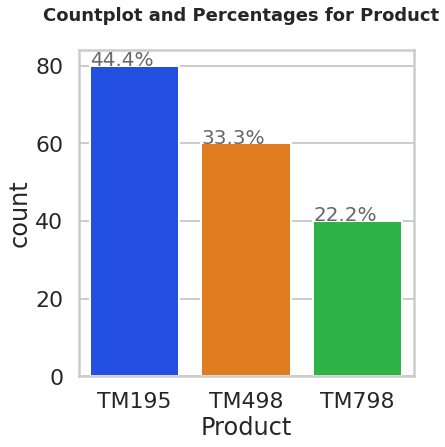

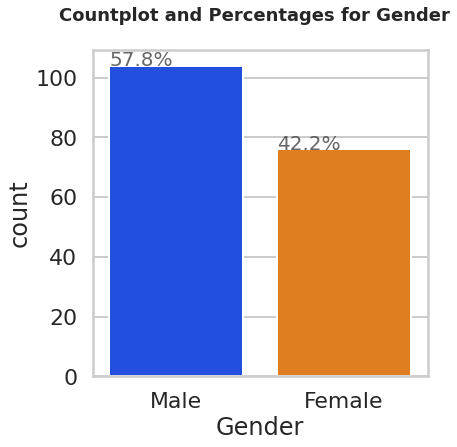

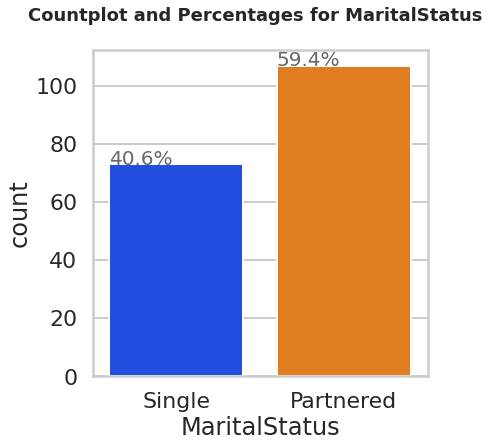

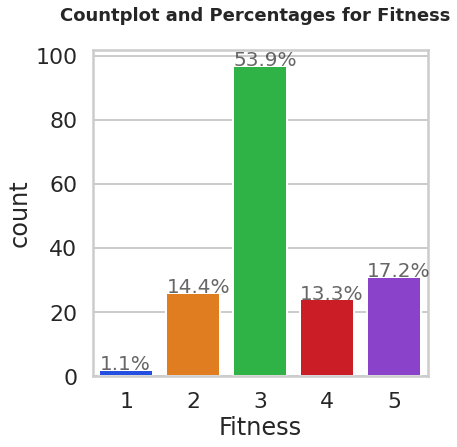

In [11]:
from matplotlib.patches import Rectangle
def plot_count(x):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    
    seriesname = x.name
    plt.suptitle(f'Countplot and Percentages for {seriesname}', fontweight='heavy', fontsize=18)
    
    sns.countplot(x, ax=ax, palette='bright')
    
    # inserting %ages above bars courtsey of StackOverflow
    # (https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)
    
    total = len(x)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        xcoord = p.get_x() + p.get_width()*0
        ycoord = p.get_y() + p.get_height()
        ax.annotate(percentage, (xcoord, ycoord), size = 20, **dict(alpha=0.7))

plot_count(cardio['Product'])
plot_count(cardio['Gender'])
plot_count(cardio['MaritalStatus'])
plot_count(cardio['Fitness'])

> **Observations**

> - There are 3 different `Products` being sold
>   - Those are *TM195*, *TM498* and *TM798* in the order of portion of total treadmill sales

> - From `Gender` perspective, majority customer have been *male*

> - The majority `MaritalStatus` of the customer is *partenered*

> - The majority customers rate themselves at `Fitness` level of *3 out of 5*

### **Multivariate Analysis**

As part of this section I will be focussing on product centered multivariate analysis, since that is the deliverable. So further analysis I will be obtaining user characterstics for each product.

- **Bivariate analysis of Product with other categorical variables**

In [12]:
pd.crosstab(index=cardio['Product'], columns=cardio['Gender']).apply(lambda r: 100*r/r.sum(), axis=1).round(2)

Gender,Female,Male
Product,,
TM195,50.00,50.00
TM498,48.33,51.67
TM798,17.50,82.50


In [13]:
print('Gender specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')


print('Fitness level specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']).apply(lambda r: 100*r/r.sum(), axis=1).round(1),'\n\n')

print('Average Fitness level of customers for each product\n')
print(cardio.groupby('Product')['Fitness'].agg(['mean']),'\n\n')


print('Marital Status specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')

Gender specific count and percentages of customers for each product

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33 

Gender   Female   Male
Product               
TM195     50.00  50.00
TM498     48.33  51.67
TM798     17.50  82.50 


Fitness level specific count and percentages of customers for each product

Fitness  1   2   3  4   5
Product                  
TM195    1  14  54  9   2
TM498    1  12  39  8   0
TM798    0   0   4  7  29 

Fitness    1     2     3     4     5
Product                             
TM195    1.2  17.5  67.5  11.2   2.5
TM498    1.7  20.0  65.0  13.3   0.0
TM798    0.0   0.0  10.0  17.5  72.5 


Average Fitness level of customers for each product

           mean
Product        
TM195    2.9625
TM498    2.9000
TM798    4.6250 


Marital Status specific count and percentages of customers for each product

MaritalStatus  Partnered  Single
Product                         
TM195                 48  

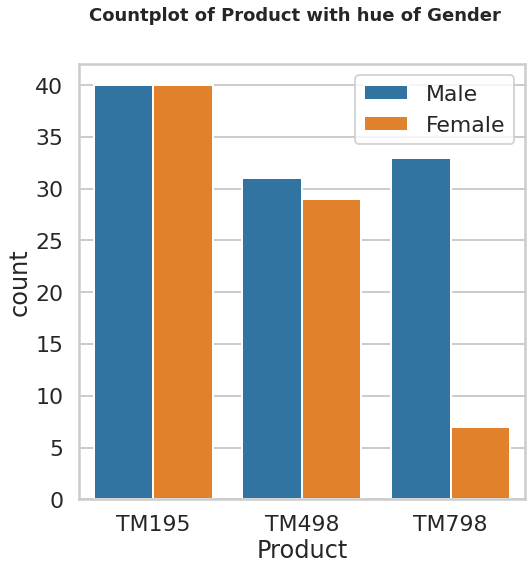

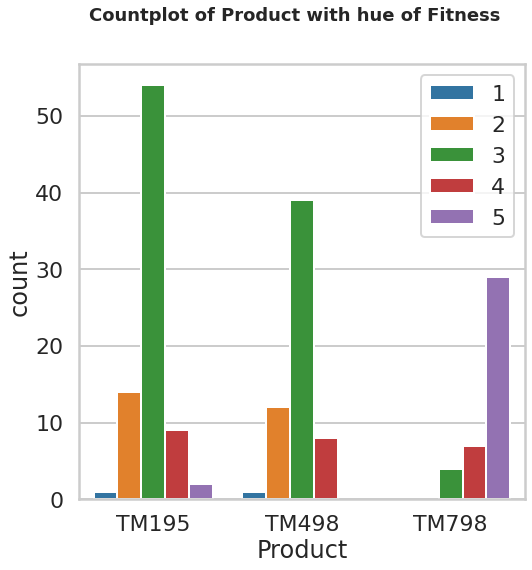

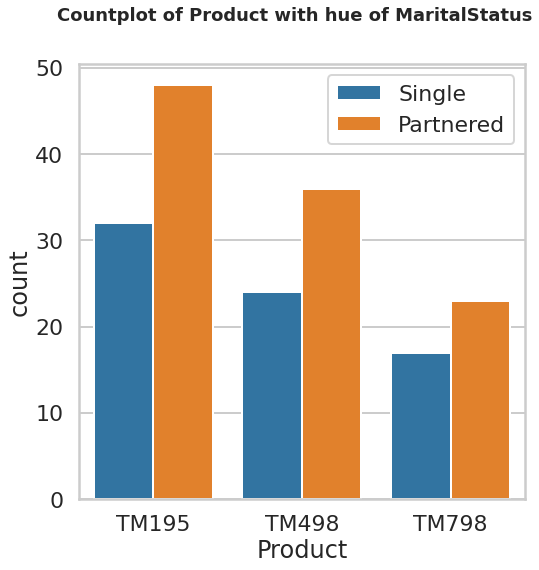

In [99]:
def plot_countplots_model(data,x,hue):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    sns.countplot(data=data, x=x, hue=hue, ax=ax)
    plt.suptitle(f'Countplot of {x} with hue of {hue}', fontweight='heavy', fontsize=18)
    ax.legend(loc='best')
    
plot_countplots_model(cardio, 'Product', 'Gender')
plot_countplots_model(cardio, 'Product', 'Fitness')
plot_countplots_model(cardio, 'Product', 'MaritalStatus')

> **Observations**

> Some interesting observations can be drawn from the simple bivariate analysis of `Product` with `Gender`, `Fitness` and `MaritalStatus`
> - `Product` #s TM195 and TM498 have almost equally gender diverse customer base. But men are the dominant customer of the `Product` TM798 
>    - This is indicating that in customers interested in buying TM798 are predominatly male

> - Again a similar pattern arises for Product #s TM195 and TM498 in terms of `Fitness` level of the customers, where they rate themselves *\~3* on an average. Whereas, the TM798 customers rate themselves much higher 
(*\~4.6*)
>    - The high `Fitness` level indicates that the TM798 is a product for more advanced user.

> - The `MaritalStatus` of the customer seems to stay in similar proportions across all products

In [218]:
def describe_product_numerical(numvar):
    
    catvars = ['Gender', 'MaritalStatus', 'Fitness']
    
    print(f'Description of Products w.r.t {numvar} and categorical variables')
    
    for catvar in catvars:
        print('\n\n')
        print(cardio.groupby(['Product',catvar])[numvar].agg(['mean','median','count']).round(1))
        
    
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    fig.tight_layout(pad=3.0)
    plt.suptitle(f'Barplot of {numvar} w.r.t Products', fontweight='heavy', fontsize=24)
    for i, var in enumerate(catvars):
        sns.barplot(data=cardio, x='Product', y=numvar, hue=var, ax=ax[i],**({'alpha':1}))
        sns.barplot(data=cardio, x='Product', y=numvar, ax=ax[i], palette='pastel',ci=None,
                    **({'fill':False,'edgecolor':'k','linestyle':'--','label':var+' agnostic mean'}))
        ax[i].set_ylim([0,1.01*cardio[numvar].max()])
        ax[i].legend(fontsize=15, loc='best')
        ax[i].title.set_text(var)

Description of Products w.r.t Income and categorical variables



                   mean   median  count
Product Gender                         
TM195   Female  46020.1  46048.5     40
        Male    46816.0  46617.0     40
TM498   Female  49336.4  48891.0     29
        Male    48634.3  50028.0     31
TM798   Female  73633.9  69721.0      7
        Male    75825.0  77191.0     33



                          mean   median  count
Product MaritalStatus                         
TM195   Partnered      47848.8  46617.0     48
        Single         44271.9  43774.5     32
TM498   Partnered      49522.7  51165.0     36
        Single         48150.1  47185.5     24
TM798   Partnered      82047.2  85906.0     23
        Single         66504.6  58516.0     17



                    mean   median  count
Product Fitness                         
TM195   1        38658.0  38658.0      1
        2        46779.4  46048.5     14
        3        46659.1  46617.0     54
        4        44974.7  4

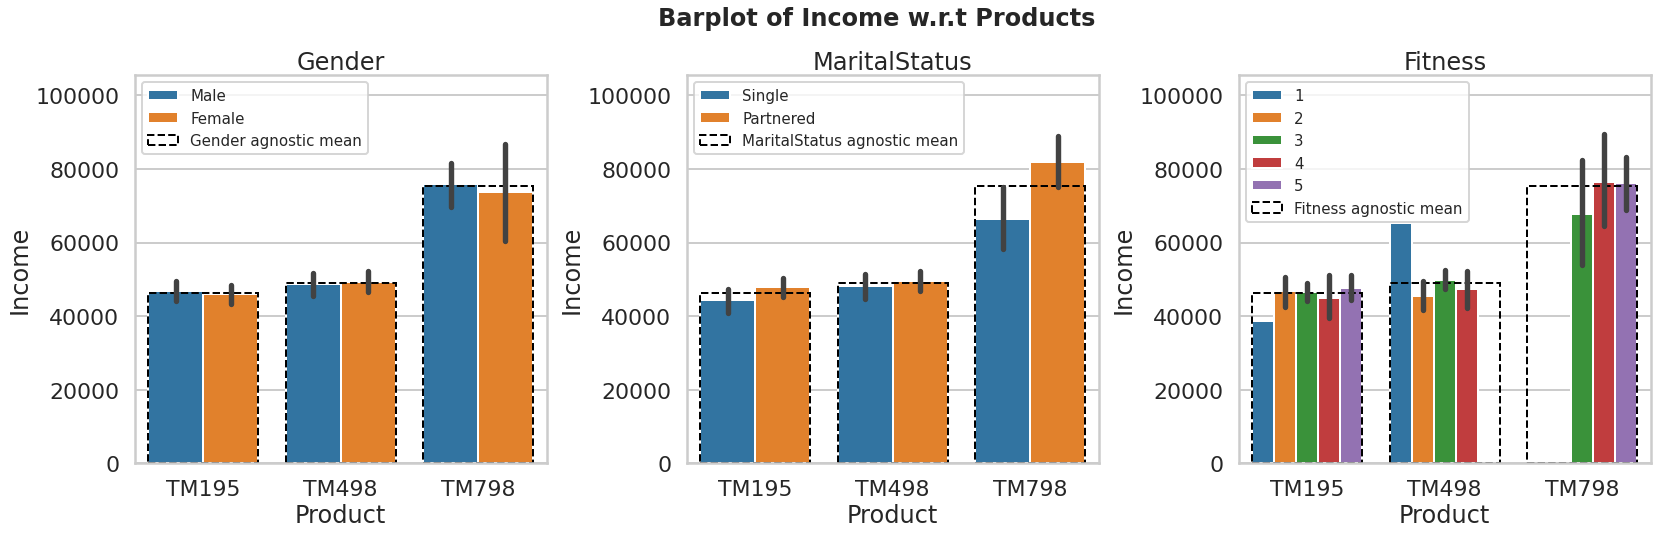

In [219]:
describe_product_numerical('Income')

Description of Products w.r.t Age and categorical variables



                mean  median  count
Product Gender                     
TM195   Female  28.4    26.5     40
        Male    28.6    26.0     40
TM498   Female  29.1    29.0     29
        Male    28.7    25.0     31
TM798   Female  27.0    26.0      7
        Male    29.5    27.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      29.7    27.5     48
        Single         26.9    25.0     32
TM498   Partnered      30.2    31.0     36
        Single         26.9    25.0     24
TM798   Partnered      29.8    28.0     23
        Single         28.1    24.0     17



                 mean  median  count
Product Fitness                     
TM195   1        23.0    23.0      1
        2        28.3    26.5     14
        3        28.6    26.5     54
        4        29.0    26.0      9
        5        29.0    29.0      2
TM498   1        31.0    31.0      1
   

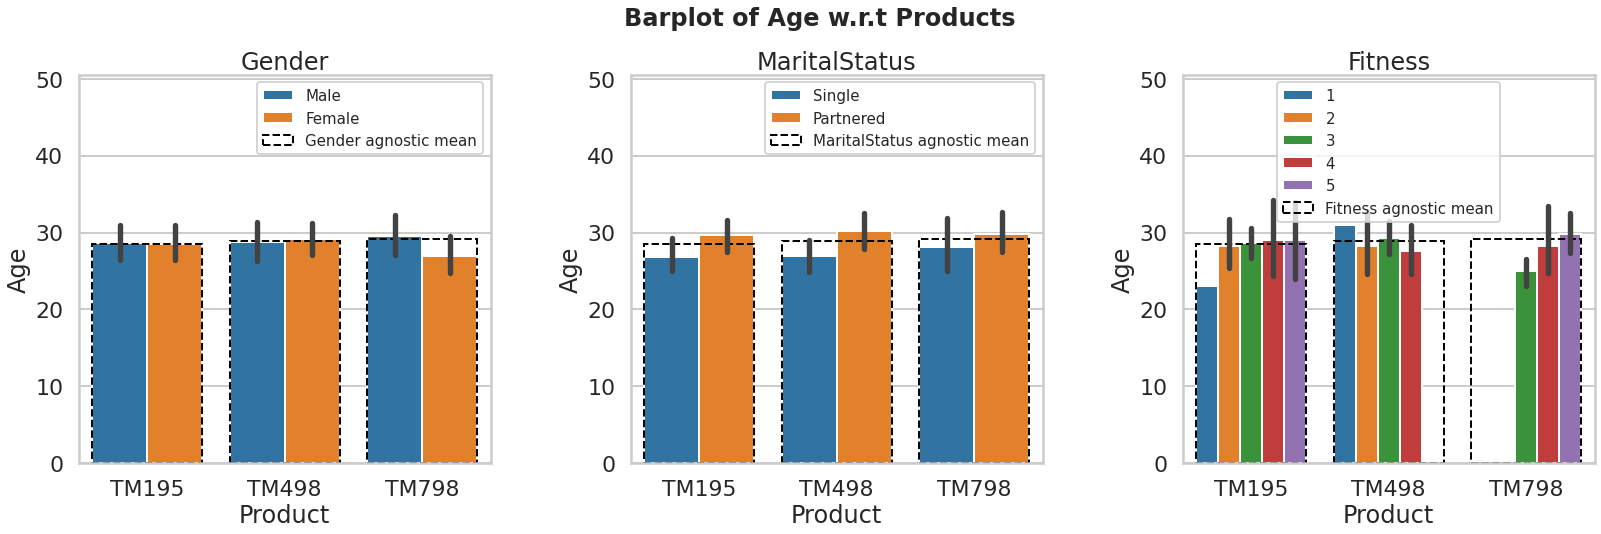

In [220]:
describe_product_numerical('Age')

Description of Products w.r.t Education and categorical variables



                mean  median  count
Product Gender                     
TM195   Female  15.1    15.5     40
        Male    15.0    16.0     40
TM498   Female  15.2    16.0     29
        Male    15.0    16.0     31
TM798   Female  17.9    18.0      7
        Male    17.2    18.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      15.1    16.0     48
        Single         14.9    15.0     32
TM498   Partnered      15.2    16.0     36
        Single         14.9    14.0     24
TM798   Partnered      17.4    18.0     23
        Single         17.2    16.0     17



                 mean  median  count
Product Fitness                     
TM195   1        16.0    16.0      1
        2        14.6    14.0     14
        3        15.1    16.0     54
        4        15.0    15.0      9
        5        16.0    16.0      2
TM498   1        18.0    18.0     

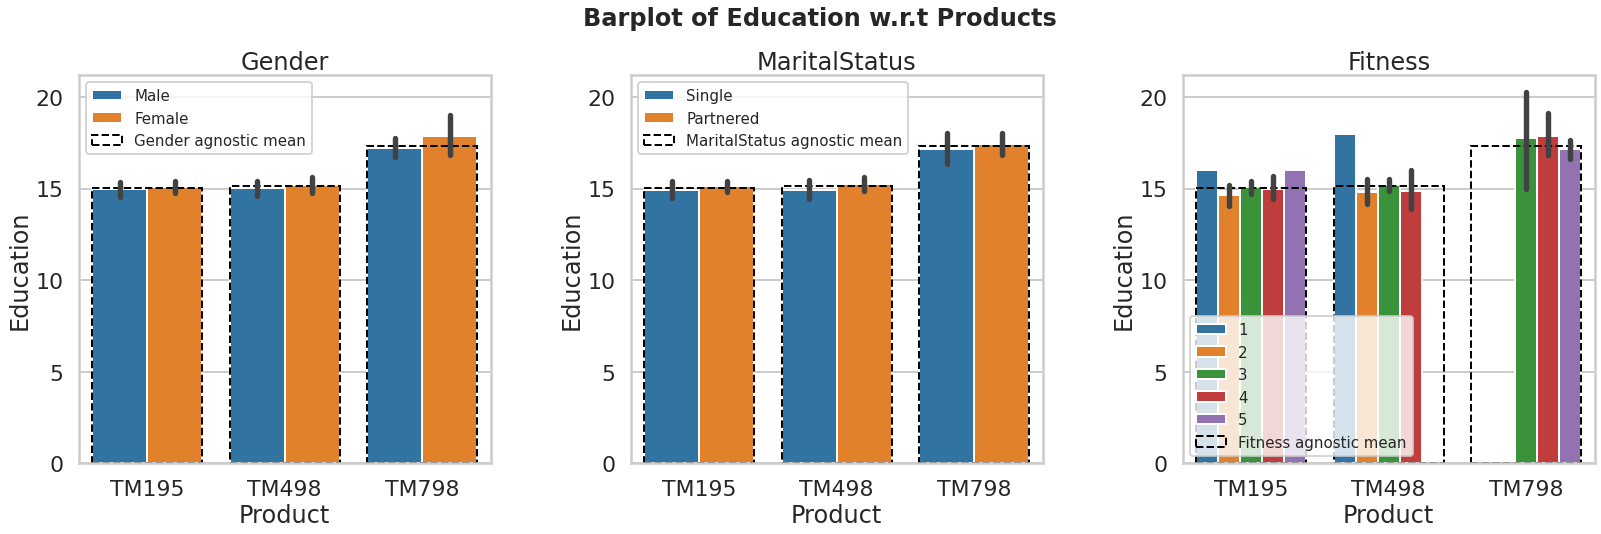

In [221]:
describe_product_numerical('Education')

Description of Products w.r.t Usage and categorical variables



                mean  median  count
Product Gender                     
TM195   Female   2.9     3.0     40
        Male     3.3     3.0     40
TM498   Female   3.1     3.0     29
        Male     3.0     3.0     31
TM798   Female   5.0     5.0      7
        Male     4.7     4.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered       3.0     3.0     48
        Single          3.2     3.0     32
TM498   Partnered       3.1     3.0     36
        Single          3.1     3.0     24
TM798   Partnered       4.9     5.0     23
        Single          4.6     5.0     17



                 mean  median  count
Product Fitness                     
TM195   1         3.0     3.0      1
        2         2.4     2.0     14
        3         3.1     3.0     54
        4         3.6     3.0      9
        5         4.5     4.5      2
TM498   1         2.0     2.0      1
 

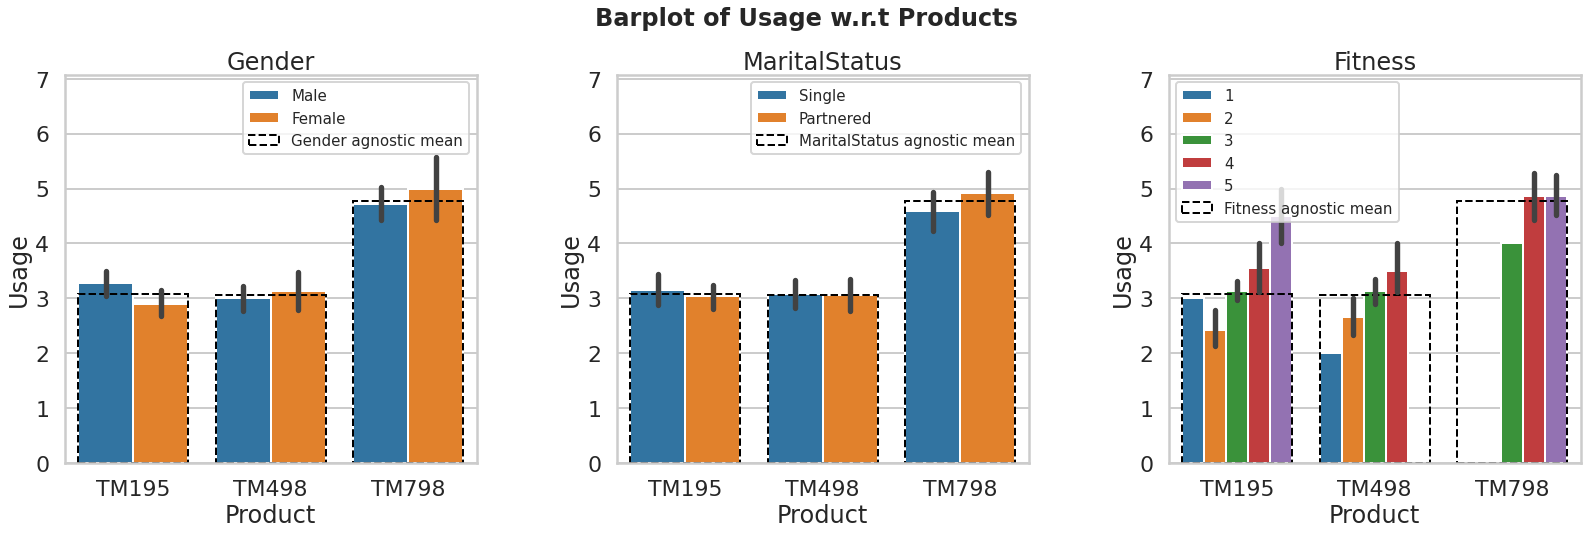

In [222]:
describe_product_numerical('Usage')

Description of Products w.r.t Miles and categorical variables



                 mean  median  count
Product Gender                      
TM195   Female   76.2    75.0     40
        Male     89.4    85.0     40
TM498   Female   87.3    85.0     29
        Male     88.5    95.0     31
TM798   Female  180.0   200.0      7
        Male    164.1   160.0     33



                        mean  median  count
Product MaritalStatus                      
TM195   Partnered       77.2    75.0     48
        Single          91.1    85.0     32
TM498   Partnered       90.1    85.0     36
        Single          84.8    85.0     24
TM798   Partnered      183.0   180.0     23
        Single         145.1   150.0     17



                  mean  median  count
Product Fitness                      
TM195   1         47.0    47.0      1
        2         49.1    47.0     14
        3         82.6    85.0     54
        4        119.1   113.0      9
        5        178.5   178.5      2
TM498   1      

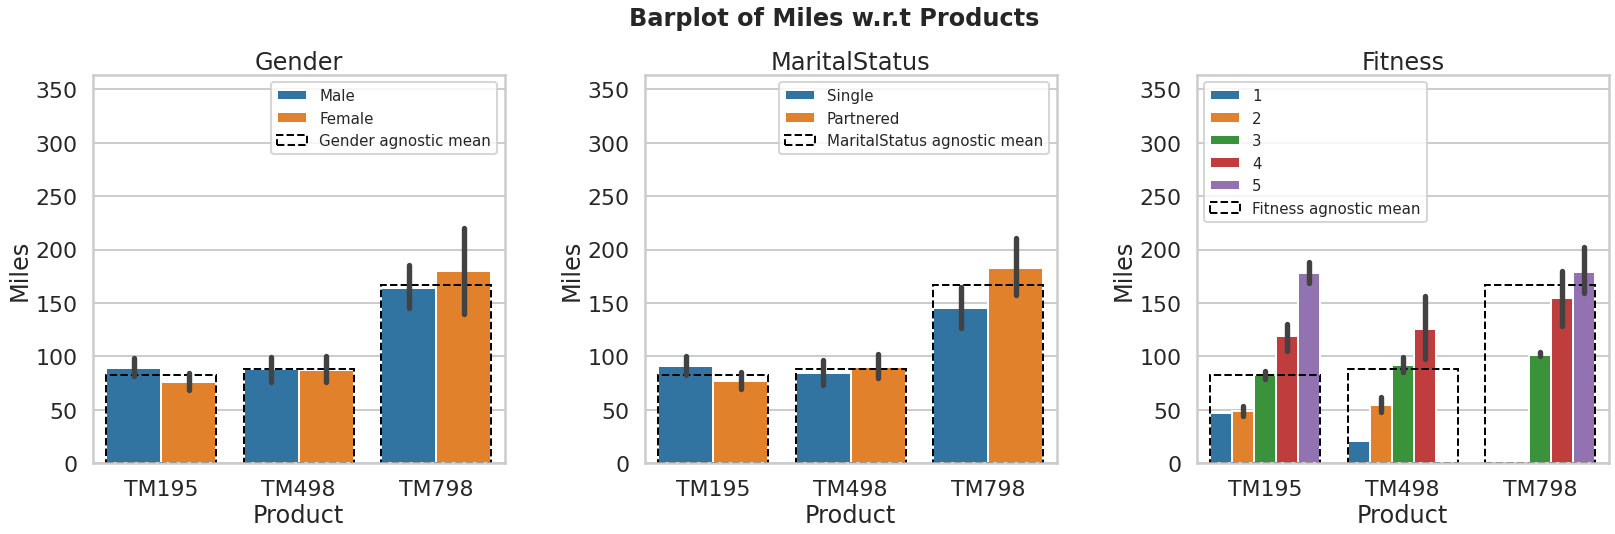

In [223]:
describe_product_numerical('Miles')

<AxesSubplot:>

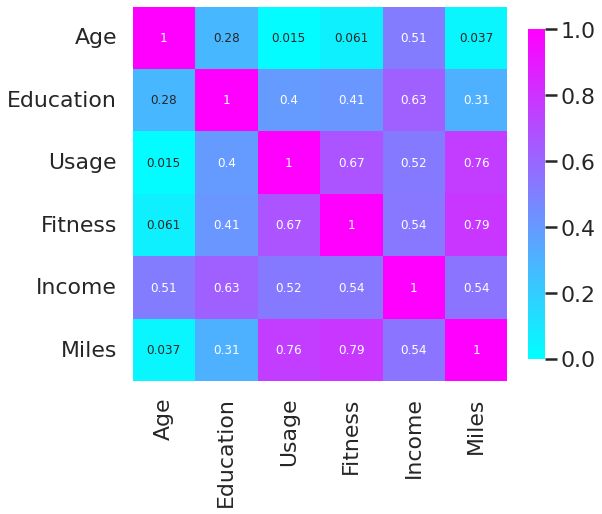

In [217]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.tight_layout(pad=2.0)

corr = cardio.corr()
sns.heatmap(corr, annot=True, ax=ax, annot_kws={'fontsize':12}, 
            cmap='cool',vmin=0,  vmax = 1, square=True, cbar_kws={'fraction':0.04})#, mask=matrix)